## continous time business

In [137]:
import random as random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[(0, 100), (1, 99.0388381451144), (2, 98.56336808897254), (3, 99.11354310491825), (4, 98.98411627070854), (5, 99.83208465242599), (6, 100.02190432655433), (7, 101.02212336981988), (8, 101.39893016341578), (9, 102.41291946504994), (10, 103.43704865970044), (11, 102.90234254971699), (12, 103.93136597521416), (13, 104.61524614473656), (14, 105.06317352112072), (15, 106.11380525633193), (16, 106.60098438015397), (17, 106.182366284678), (18, 107.24418994752477), (19, 106.17174804804952), (20, 106.82751870006354), (21, 106.95639112599163), (22, 108.02595503725155), (23, 106.94569548687903), (24, 106.91827876392566), (25, 106.14761660930643), (26, 105.25166409382612), (27, 104.62448089247394), (28, 105.59050332675204), (29, 106.19406797602214), (30, 106.5184787309976), (31, 107.58366351830757), (32, 108.65950015349065), (33, 107.57290515195575), (34, 107.7397452767089), (35, 107.69880851471405), (36, 108.11889516984041), (37, 107.75961296240088), (38, 108.43441128818712), (39, 107.35006717530

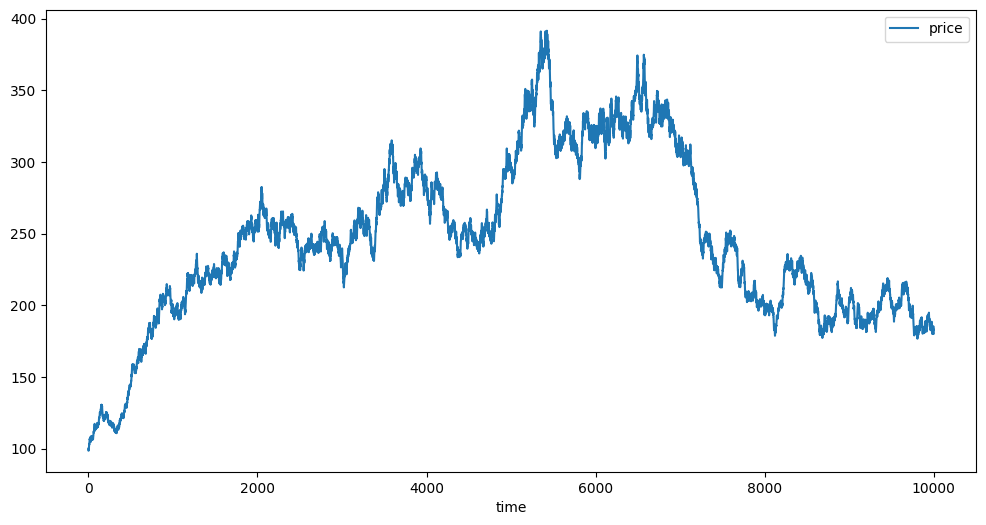

In [138]:
S0 = 100
prices = [(0, S0)]
S1 = S0

for t in range(1, 10001):
    shock = max(min(random.gauss(0, 1), 1), -1)/100
    S2 = S1*(1+(shock))
    prices.append((t, S2))
    S1 = S2

print(prices)

df = pd.DataFrame(prices, columns=["time", "price"])

df.plot(x="time", y="price", figsize=(12,6))
plt.show()


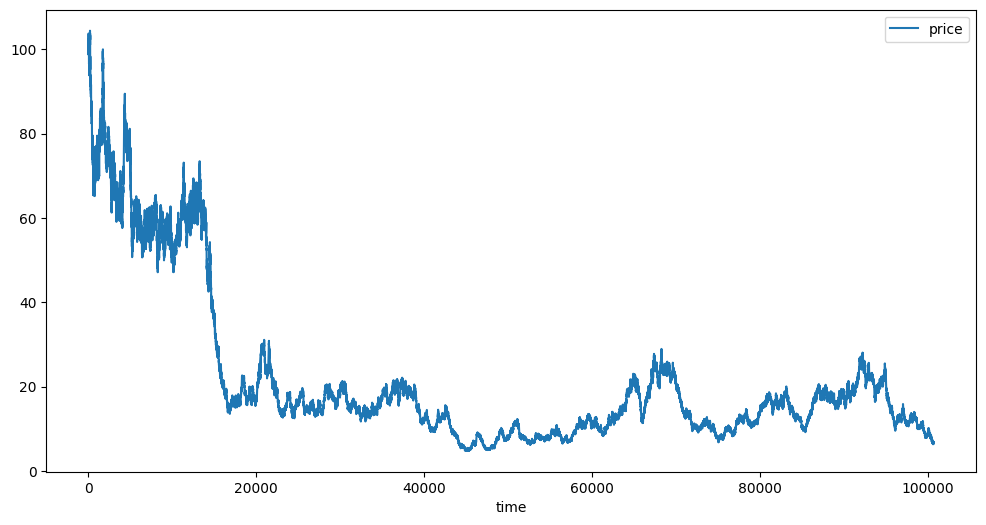

In [139]:
S0 = 100
S1 = S0
t = 0.0
lam = 1.0  # intensity of the trade arrival process

prices = [(t, S1)]

for _ in range(100001):

    # random time until next trade (exponential distribution)
    dt = random.expovariate(lam)
    t += dt

    # shock from a clipped normal distribution
    shock = max(min(random.gauss(0, 1), 1), -1) / 100

    # update price
    S1 = S1 * (1 + shock)

    prices.append((t, S1))

df = pd.DataFrame(prices, columns=["time", "price"])

df.plot(x="time", y="price", figsize=(12,6))
plt.show()


c:\Users\ofurn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


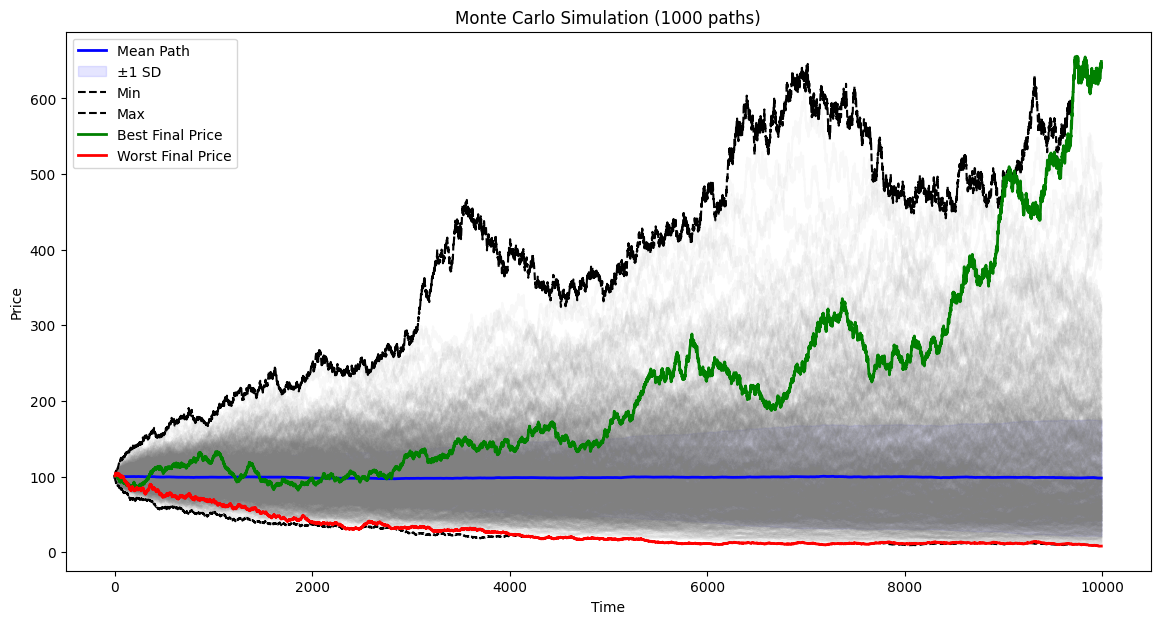

In [140]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PARAMETERS
N_PATHS = 1000
N_STEPS = 10000
S0 = 100
lam = 1.0  # arrival rate of trades


def simulate_path():
    """Simulate one price path with random trade arrival times."""
    S = S0
    t = 0.0

    times = []
    prices = []

    for _ in range(N_STEPS):

        # dt from Exp(lam)
        dt = random.expovariate(lam)
        t += dt

        # shock from clipped normal
        shock = max(min(random.gauss(0, 1), 1), -1) / 100

        # price update
        S = S * (1 + shock)

        times.append(t)
        prices.append(S)

    return np.array(times), np.array(prices)


# ---- RUN SIMULATION ----

all_times = []
all_prices = []

for _ in range(N_PATHS):
    t, p = simulate_path()
    all_times.append(t)
    all_prices.append(p)

# Pad paths so they can be aligned by index
# (since times differ slightly)
max_len = max(len(p) for p in all_prices)

aligned_prices = np.full((N_PATHS, max_len), np.nan)
aligned_times = np.full((N_PATHS, max_len), np.nan)

for i in range(N_PATHS):
    aligned_prices[i, :len(all_prices[i])] = all_prices[i]
    aligned_times[i, :len(all_times[i])] = all_times[i]

# Use index as the alignment frame
t_plot = np.nanmean(aligned_times, axis=0)

# --- SUMMARY LINES ---
mean_path = np.nanmean(aligned_prices, axis=0)
std_path = np.nanstd(aligned_prices, axis=0)
min_path = np.nanmin(aligned_prices, axis=0)
max_path = np.nanmax(aligned_prices, axis=0)

# best/worst final price (last non-nan value)
final_vals = np.array([p[~np.isnan(p)][-1] for p in aligned_prices])
best_idx = np.argmax(final_vals)
worst_idx = np.argmin(final_vals)

# ---- PLOT ----
plt.figure(figsize=(14, 7))

# all paths
for i in range(N_PATHS):
    plt.plot(t_plot, aligned_prices[i], color="gray", alpha=0.05)

# mean path
plt.plot(t_plot, mean_path, color="blue", label="Mean Path", linewidth=2)

# ±1 std band
plt.fill_between(t_plot,
                 mean_path - std_path,
                 mean_path + std_path,
                 color="blue", alpha=0.1, label="±1 SD")

# min/max envelopes
plt.plot(t_plot, min_path, color="black", linestyle="--", label="Min")
plt.plot(t_plot, max_path, color="black", linestyle="--", label="Max")

# highlight best/worst paths
plt.plot(t_plot, aligned_prices[best_idx], color="green", linewidth=2, label="Best Final Price")
plt.plot(t_plot, aligned_prices[worst_idx], color="red", linewidth=2, label="Worst Final Price")

plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"Monte Carlo Simulation ({N_PATHS} paths)")
plt.legend()
plt.show()


In [141]:
stats = pd.DataFrame({
    "final_price": final_vals,
    "total_return": final_vals / S0 - 1,
    "max_price": [np.nanmax(p) for p in aligned_prices],
    "min_price": [np.nanmin(p) for p in aligned_prices],
    "volatility": [np.nanstd(np.diff(p) / p[:-1]) for p in aligned_prices]
})

print(stats.describe())


       final_price  total_return    max_price    min_price   volatility
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000
mean     98.098483     -0.019015   169.266683    54.343525     0.007182
std      76.324610      0.763246    80.304614    22.403805     0.000028
min       8.212853     -0.917871    99.000000     8.030214     0.007090
25%      48.362266     -0.516377   116.072833    36.179680     0.007163
50%      74.569785     -0.254302   143.485188    53.926749     0.007183
75%     126.733801      0.267338   189.865985    71.232105     0.007202
max     648.839841      5.488398   655.742170   101.000000     0.007265
